### **Q1) 	For SAT dataset show the outliers using z-score and modifier z-score.**

In [1]:
pip install scipy numpy matplotlib pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib inline

import sys
import scipy
import scipy.stats as ss
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import random

In [3]:
ct_test = pd.read_csv("apartments_for_rent_classified_10K.csv", sep=";", encoding='cp1252') 
print(ct_test.shape)
ct_test.head()

(10000, 22)


,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",10,5.0,0,USD,No,Thumbnail,...,$790,Monthly,101,5,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",5,5.0,1,USD,No,Thumbnail,...,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",5,1.0,0,USD,No,Thumbnail,...,"$1,390",Monthly,107,5,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",7,1.0,0,USD,No,Thumbnail,...,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",9,5.0,0,USD,No,Thumbnail,...,$880,Monthly,125,5,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401


In [4]:
mean_rate = ct_test['square_feet'].mean()


# ddof is the degrees of freedom correction 
# in the calculation of the standard deviation;
# for population standard deviation ddof=0
stdev_rate = ct_test['square_feet'].std(ddof=0)

In [5]:
print('Mean of square feet is {:.3f}'.format(mean_rate))
print('Standard deviation of square feet is {:.3f}'.format(stdev_rate))

Mean of square feet is 945.811
Standard deviation of square feet is 655.723


Calculate the z-score and add the result to the dataframe.

In [6]:
zscore_rate = ss.zscore(ct_test['square_feet'], ddof=0)
ct_test = ct_test.assign(zscore=zscore_rate)
ct_test.head(8)

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_type,square_feet,address,cityname,state,latitude,longitude,source,time,zscore
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",10,5.0,0,USD,No,Thumbnail,...,Monthly,101,5,Washington,DC,38.9057,-76.9861,RentLingo,1577359415,-1.288365
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",5,5.0,1,USD,No,Thumbnail,...,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063,-1.280740
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",5,1.0,0,USD,No,Thumbnail,...,Monthly,107,5,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410,-1.279215
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",7,1.0,0,USD,No,Thumbnail,...,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743,-1.265489
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",9,5.0,0,USD,No,Thumbnail,...,Monthly,125,5,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401,-1.251764
5,5667891676,housing/rent/apartment,0 BR in New York NY 10019,**RARE GEM WITH PRIVATE OUTDOOR TERRACE****AVA...,"Dishwasher,Elevator,Patio/Deck,Pool,Storage",1.0,0,USD,No,Thumbnail,...,Monthly,130,350 West 50th St,Manhattan,NY,40.7629,-73.9885,Listanza,1577289784,-1.244139
6,5668627426,housing/rent/apartment,Studio apartment 2432 Penmar Ave,"This unit is located at 2432 Penmar Ave, Venic...",5,5.0,0,USD,No,Thumbnail,...,Monthly,132,2432 Penmar Avenue,Venice,CA,33.9932,-118.4609,RentLingo,1577359461,-1.241089
7,5668626687,housing/rent/apartment,"Studio apartment Oak St NW, 16th St NW, Washin...","This unit is located at Oak St NW, 16th St NW,...",5,5.0,0,USD,No,Thumbnail,...,Monthly,136,5,Washington,DC,38.9328,-77.0297,RentLingo,1577359393,-1.234989


Now identify the anomalies and plot the results.

In [7]:
def plot_anomaly(score_data, threshold):
    # Mask to plot values above and below threshold in different colors
    score_data = score_data.copy().sort_values(ascending=False).values
    ranks = np.linspace(1, len(score_data), len(score_data))
    mask_outlier = (score_data < threshold)
    
    
    plt.figure(dpi=150)
    plt.plot(ranks[~mask_outlier], score_data[~mask_outlier],'o', color='b',label='OK adress')
    plt.plot(ranks[mask_outlier], score_data[mask_outlier],'o', color='r', label='anomalies')
    plt.axhline(threshold,color='r',label='threshold', alpha=0.5)
    plt.legend(loc = 'lower left')
    plt.title('Z-score vs. address', fontweight='bold')
    plt.xlabel('Ranked address')
    plt.ylabel('Z-score')
    plt.show()

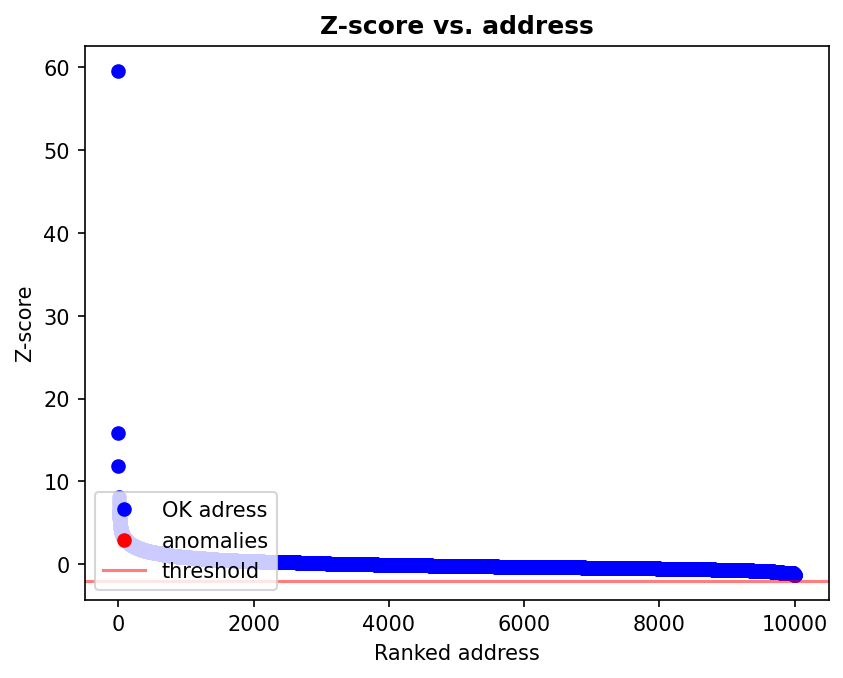

In [8]:
plot_anomaly(ct_test['zscore'], -2)

Finally, get a list of the address that are anomalies.

In [9]:
zscore_anomalies = ct_test[(ct_test['zscore'] < -1)]
zscore_anomalies

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_type,square_feet,address,cityname,state,latitude,longitude,source,time,zscore
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",10,5.0,0,USD,No,Thumbnail,...,Monthly,101,5,Washington,DC,38.9057,-76.9861,RentLingo,1577359415,-1.288365
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",5,5.0,1,USD,No,Thumbnail,...,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063,-1.280740
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",5,1.0,0,USD,No,Thumbnail,...,Monthly,107,5,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410,-1.279215
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",7,1.0,0,USD,No,Thumbnail,...,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743,-1.265489
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",9,5.0,0,USD,No,Thumbnail,...,Monthly,125,5,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401,-1.251764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,5668637855,housing/rent/apartment,Studio apartment 1307 N. Northgate Way,"This unit is located at 1307 N. Northgate Way,...",5,1.0,0,USD,No,Thumbnail,...,Monthly,288,1307 N Northgate Way,Seattle,WA,47.6160,-122.3275,RentLingo,1577360185,-1.003184
198,5509169687,housing/rent/apartment,One BR - Oakdale Apartments For Rent This sere...,Unit number: 0603. 1 story living community in...,"AC,Cable or Satellite,Internet Access,Parking,...",1.0,1,USD,No,Yes,...,Monthly,288,5,Oakdale,PA,40.3911,-80.1989,RentDigs.com,1568777542,-1.003184
199,5664573764,housing/rent/apartment,Studio apartment 8525 North Armenia,"This unit is located at 8525 North Armenia, Ta...","Basketball,Cable or Satellite,Dishwasher,Playg...",1.0,1,USD,No,Thumbnail,...,Monthly,288,8525 North,Tampa,FL,28.0076,-82.4792,RentLingo,1577015236,-1.003184
200,5668632975,housing/rent/apartment,Studio apartment 610 NW 17th Ave,"This unit is located at 610 NW 17th Ave, Portl...",5,1.0,0,USD,No,Thumbnail,...,Monthly,290,610 NW 17th Avenue,Portland,OR,45.5091,-122.6449,RentLingo,1577359880,-1.000134


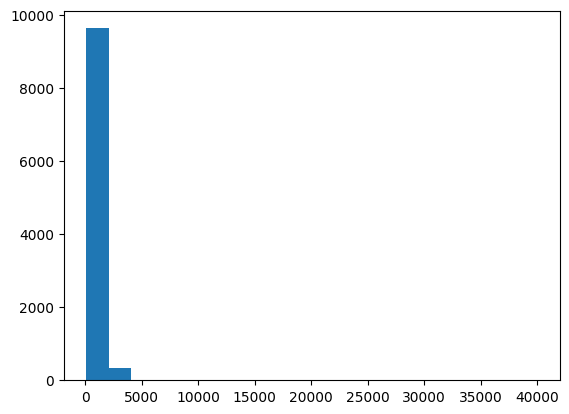

In [10]:
nbins= 20
n_hist, bins_hist, patches_hist = plt.hist(ct_test['square_feet'], nbins, density=False,
                           cumulative=False, linewidth=1.0, label='data')

This histogram has one maxima.

We can also compare the cumulative distribution function for our data with the CDF of a normal distribution with the same mean and standard deviation of our data.

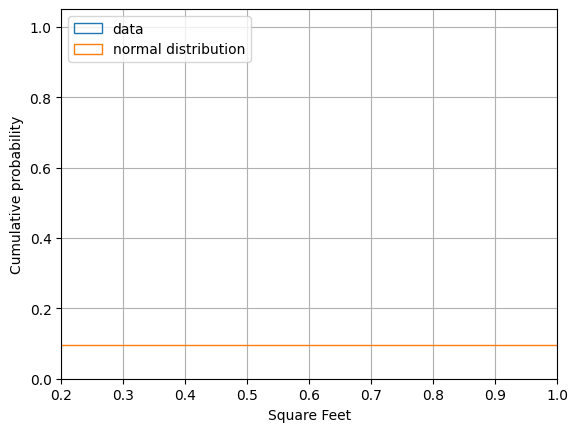

In [11]:
num_bins = 130
normal_dist = [random.gauss(mean_rate, stdev_rate) for _ in range(500)]
n, bins, patches = plt.hist(ct_test['square_feet'], num_bins, density=True, histtype='step',
                           cumulative=True, linewidth=1.0, label='data')
plt.hist(normal_dist, num_bins, density=True, histtype='step',
                           cumulative=True, linewidth=1.0, label='normal distribution')
plt.grid(True)
plt.legend(loc='upper left')
axes = plt.gca()
axes.set_xlim([0.2,1.0])
plt.xlabel('Square Feet')
plt.ylabel('Cumulative probability')
plt.show()

In [12]:
def modified_zscore(data, consistency_correction=1.4826):
    """
    Returns the modified z score and Median Absolute Deviation (MAD) from the scores in data.
    The consistency_correction factor converts the MAD to the standard deviation for a given
    distribution. The default value (1.4826) is the conversion factor if the underlying data
    is normally distributed
    """
    median = np.median(data)
    
    deviation_from_med = np.array(data) - median

    mad = np.median(np.abs(deviation_from_med))
    mod_zscore = deviation_from_med/(consistency_correction*mad)
    return mod_zscore, mad

In [13]:
mad_zscore, mad_participation = modified_zscore(ct_test['square_feet'])
z_sc_participation = ct_test.assign(zscore_median=mad_zscore)

In [14]:
mod_zscore_anomalies = z_sc_participation[(z_sc_participation['zscore_median'] < -2)]
mod_zscore_anomalies

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,square_feet,address,cityname,state,latitude,longitude,source,time,zscore,zscore_median
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",10,5.0,0,USD,No,Thumbnail,...,101,5,Washington,DC,38.9057,-76.9861,RentLingo,1577359415,-1.288365,-2.340683
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",5,5.0,1,USD,No,Thumbnail,...,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063,-1.280740,-2.323988
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",5,1.0,0,USD,No,Thumbnail,...,107,5,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410,-1.279215,-2.320649
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",7,1.0,0,USD,No,Thumbnail,...,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743,-1.265489,-2.290597
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",9,5.0,0,USD,No,Thumbnail,...,125,5,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401,-1.251764,-2.260546
5,5667891676,housing/rent/apartment,0 BR in New York NY 10019,**RARE GEM WITH PRIVATE OUTDOOR TERRACE****AVA...,"Dishwasher,Elevator,Patio/Deck,Pool,Storage",1.0,0,USD,No,Thumbnail,...,130,350 West 50th St,Manhattan,NY,40.7629,-73.9885,Listanza,1577289784,-1.244139,-2.243850
6,5668627426,housing/rent/apartment,Studio apartment 2432 Penmar Ave,"This unit is located at 2432 Penmar Ave, Venic...",5,5.0,0,USD,No,Thumbnail,...,132,2432 Penmar Avenue,Venice,CA,33.9932,-118.4609,RentLingo,1577359461,-1.241089,-2.237172
7,5668626687,housing/rent/apartment,"Studio apartment Oak St NW, 16th St NW, Washin...","This unit is located at Oak St NW, 16th St NW,...",5,5.0,0,USD,No,Thumbnail,...,136,5,Washington,DC,38.9328,-77.0297,RentLingo,1577359393,-1.234989,-2.223816
8,5668610290,housing/rent/apartment,Studio apartment 333 Hyde St,"This unit is located at 333 Hyde St, San Franc...",Refrigerator,1.0,0,USD,No,Thumbnail,...,138,333 Hyde St,San Francisco,CA,37.7599,-122.4379,RentLingo,1577358313,-1.231939,-2.217138
9,5668627023,housing/rent/apartment,"Studio apartment A St SE, 19th St SE, Washington","This unit is located at A St SE, 19th St SE, W...",5,5.0,0,USD,No,Thumbnail,...,141,5,Washington,DC,38.9118,-77.0132,RentLingo,1577359424,-1.227364,-2.207121


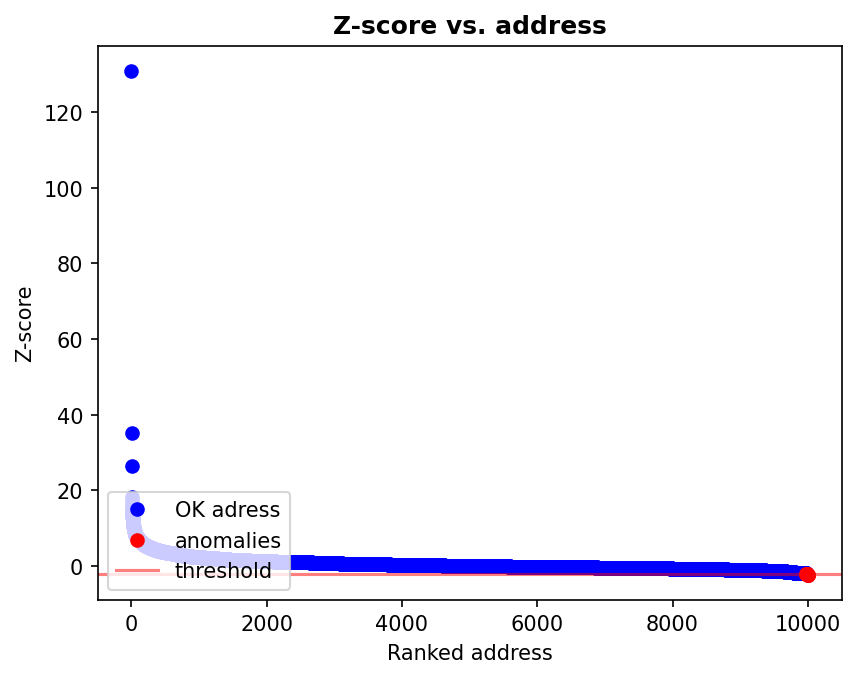

In [15]:
plot_anomaly(z_sc_participation['zscore_median'], -2)

In [16]:
z_sc_participation['zscore_median'].describe()

count    10000.000000
mean         0.480192
std          2.189610
min         -2.340683
25%         -0.510877
50%          0.000000
75%          0.995041
max        130.884598
Name: zscore_median, dtype: float64

In [17]:
z_sc_participation['zscore'].describe()

count    1.000000e+04
mean    -9.094947e-17
std      1.000050e+00
min     -1.288365e+00
25%     -4.526462e-01
50%     -2.193159e-01
75%      2.351443e-01
max      5.955898e+01
Name: zscore, dtype: float64

### **Q2) For Football data show the outliers using z-score and modifier z-score.**

In [18]:
# First row is a header row, but the header names are cumbersome. 
# Skip first row and manually label
# Encoding ensures that accents in sames are rendered properly 
top_bedrooms = pd.read_csv("apartments_for_rent_classified_10K.csv",sep=";",
                        encoding='cp1252',
                        names=['amenities', 'bathrooms', 'bedrooms'], skiprows=1)                                                                                
top_bedrooms

,,,,,,,,,,,,,,,,,,,amenities,bathrooms,bedrooms
5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE, Washington, DC 20002","This unit is located at second St NE, Uhland Terrace NE, Washington, DC 20002, Washington, 20002, DCMonthly rental rates range from $790 - $1090We have studio units available for rent",10,5.0,0,USD,No,Thumbnail,NaN,790,$790,Monthly,101,5,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evansville, 47712, INMonthly rental rates range from $425 - $445We have studio - 1 beds units available for rent",5,5.0,1,USD,No,Thumbnail,NaN,425,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arlington, VA 22209","This unit is located at N Scott St, 14th St N, Arlington, VA 22209, Arlington, 22209, VAMonthly rental rates range from $1390We have studio units available for rent",5,1.0,0,USD,No,Thumbnail,NaN,1390,"$1,390",Monthly,107,5,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle, 98122, WAMonthly rental rates range from $925We have studio units available for rent",7,1.0,0,USD,No,Thumbnail,NaN,925,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland St, Arlington","This unit is located at Washington Blvd, N Cleveland St, Arlington, Arlington, 22201, VAMonthly rental rates range from $880We have studio units available for rent",9,5.0,0,USD,No,Thumbnail,NaN,880,$880,Monthly,125,5,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5630240092,housing/rent/apartment,Five BR 5407 Abbott Place - Abbott,"This unit is located at 5407 Abbott Place - Abbott, Edina, 55410, MNMonthly rental rates range from $6000We have 5 beds units available for rent",5,4.0,5,USD,No,Thumbnail,NaN,6000,"$6,000",Monthly,6300,5407 Abbott Place Abbott,Edina,MN,44.9000,-93.3233,RentLingo,1575112975
5668640983,housing/rent/apartment,Six BR 256 Las Entradas,"This unit is located at 256 Las Entradas, Montecito, 93108, CAMonthly rental rates range from $25000We have 6 beds units available for rent",5,8.0,6,USD,No,Thumbnail,NaN,25000,"$25,000",Monthly,8716,256 Las Entradas,Montecito,CA,34.4331,-119.6331,RentLingo,1577360419
5668643292,housing/rent/apartment,Six BR 9908 Bentcross Drive,"This unit is located at 9908 Bentcross Drive, Potomac, 20854, MDMonthly rental rates range from $11000We have 6 beds units available for rent",5,8.5,6,USD,No,Thumbnail,NaN,11000,"$11,000",Monthly,11318,9908 Bentcross Dr,Potomac,MD,39.0287,-77.2409,RentLingo,1577360560
5668662559,housing/rent/apartment,One BR in New York NY 10069,"Monthly Rent$4,605 -to $4,790AmenitiesThe Aldyn offers some of the finest amenities amongst Upper West Side apartments. The club-style way of apartment living offers residents countless amenities right at their doorstep - the cornerstone being the 40,000 sq. feet La Palestra Athletic Club and Spa. This prestigious facility includes a 75 foot indoor pool, hot bath-tub, 38 foot rock climbing wall, basketball and squash courts, personal training, bowling alley, and more!Community Amenities 75 ft indoor swimming pool and hot bathtub 38 Rock Climbing Wall Elegant Roman and Williams designed lobby & lounge Childrens indoor children's play area by KIDVILLE Pets allowed Free shuttle to Columbus Circle & 72nd/Broadway Entertainment room with gourmet catering kitchen 24hr attendant at door/concierge services On-site parking garage Private landscaped court yard by Mathews Nielson Squash court Bike Room Bowling Alley, game room and golf simulator Spa features mens & peoples locker rooms","Basketball,Cable

Once again will start by using the z-score to identify anomalies. As we are interested in the superstars, this time we will have an upper threshold. We choose  z=+2
 . Above this z-score, any bedroom will be labeled as an anomaly.
As before, we calculate the mean and standard deviation.

In [19]:
mean_bedrooms = top_bedrooms['bedrooms'].mean()
stdev_bedrooms = top_bedrooms['bedrooms'].std(ddof=0)
print('Mean number of bedrooms is {:.2f}'.format(mean_bedrooms))
print('Standard deviation is {:.2f}'.format(stdev_bedrooms))

Mean number of bedrooms is 1574891175.31
Standard deviation is 3762207.02


Calculate the z-score for each bedroom and add the result to the dataframe.

In [20]:
zscore_bedrooms = ss.zscore(top_bedrooms['bedrooms'], ddof=0)
top_bedrooms = top_bedrooms.assign(zscore=zscore_bedrooms)
top_bedrooms.head(21)

,,,,,,,,,,,,,,,,,,,amenities,bathrooms,bedrooms,zscore
5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE, Washington, DC 20002","This unit is located at second St NE, Uhland Terrace NE, Washington, DC 20002, Washington, 20002, DCMonthly rental rates range from $790 - $1090We have studio units available for rent",10,5.0,0,USD,No,Thumbnail,NaN,790,$790,Monthly,101,5,Washington,DC,38.9057,-76.9861,RentLingo,1577359415,0.656062
5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evansville, 47712, INMonthly rental rates range from $425 - $445We have studio - 1 beds units available for rent",5,5.0,1,USD,No,Thumbnail,NaN,425,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063,0.565064
5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arlington, VA 22209","This unit is located at N Scott St, 14th St N, Arlington, VA 22209, Arlington, 22209, VAMonthly rental rates range from $1390We have studio units available for rent",5,1.0,0,USD,No,Thumbnail,NaN,1390,"$1,390",Monthly,107,5,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410,0.656060
5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle, 98122, WAMonthly rental rates range from $925We have studio units available for rent",7,1.0,0,USD,No,Thumbnail,NaN,925,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743,0.472214
5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland St, Arlington","This unit is located at Washington Blvd, N Cleveland St, Arlington, Arlington, 22201, VAMonthly rental rates range from $880We have studio units available for rent",9,5.0,0,USD,No,Thumbnail,NaN,880,$880,Monthly,125,5,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401,0.656058
5667891676,housing/rent/apartment,0 BR in New York NY 10019,"**RARE GEM WITH PRIVATE OUTDOOR TERRACE****AVAILABLE IMMEDIATELY** $2475 RENT IS NET EFFECTIVE WITH one month FREE ON $2700 Monthly rent***Low Fee*UNFURNISHED Spacious and Sunny Southern facing studio (403 sq-ft) with big private terrace (130 sq. feet) basks in natural sunlight all day long, facing the scenic landscaped and peaceful residents ct. yard. The apartment features hard wood floors throughout, a carousel kitchen with new appliances and two big closets. Laundry on floor steps away.Worldwide Plaza is a full-service condo that pampers its residents with concierge and 24-hr attendant at door services, a live-in resident manager, a scenic landscaped court yard and lounge, valet service, 8 laundry rooms (washer and dryers are permitted within the residences), on-site garage and a separate full-service health club (NYSC ELITE) equipped with a 25 meter salt water pool, immersive VR spin cycling room, sauna, steam room, etc.","Dishwasher,Elevator,Patio/Deck,Pool,Storage",1.0,0,USD,No,Thumbnail,5,2475,"$2,475",Monthly,130,350 West 50th St,Manhattan,NY,40.7629,-73.9885,Listanza,1577289784,0.637554
5668627426,housing/rent/apartment,Studio apartment 2432 Penmar Ave,"This unit is located at 2432 Penmar Ave, Venice, 90291, CAMonthly rental rates range from $1800We have studio units available for rent",5,5.0,0,USD,No,Thumbnail,NaN,1800,"$1,800",Monthly,132,2432 Penmar Avenue,Venice,CA,33.9932,-118.4609,RentLingo,1577359461,0.656074
5668626687,housing/rent/apartment,"Studio apartment Oak St NW, 16th St NW, Washington, DC 20010","This unit is located at Oak St NW, 16th St NW, Washington, DC 20010, Washington, 20010, DCMonthly rental rates range from $840We have studio units available for rent",5,5.0,0,USD,No,Thumbnail,NaN,840,$840,Monthly,136,5,Washington,DC,38.9328,-77.0297,RentLingo,1577359393,0.656056
5668610290,housing/rent/apartment,Studio apartment 333 Hyde St,"This unit is located at 333 Hyde St, San Francisco, 94109, CAMonthly rental rates range from $1495We have studio units available for rent Apartment features 

Now, modify the previous plotting function to display the results.

In [22]:
def plot_anomaly_bedrooms(score_data, threshold):
    score_data = score_data.copy().sort_values(ascending=False).values
    ranks = np.linspace(1, len(score_data), len(score_data))
    mask_outlier = (score_data > threshold)
    
    plt.figure(dpi=150)
    plt.plot(ranks[mask_outlier], score_data[mask_outlier], 'o', color='r', label='anomalies')
    plt.plot(ranks[~mask_outlier], score_data[~mask_outlier], 'o', color='b', label='typical bedroom')
    plt.axhline(threshold,color='r', label='threshold', alpha=0.5)
    plt.legend(loc='upper right')
    plt.title('Z-score vs. bedroom', fontweight='bold')
    plt.xticks(np.arange(0, 21, step=2.0))
    plt.xlabel('Bedroom Rank')
    plt.ylabel('Z-score')
    plt.show()

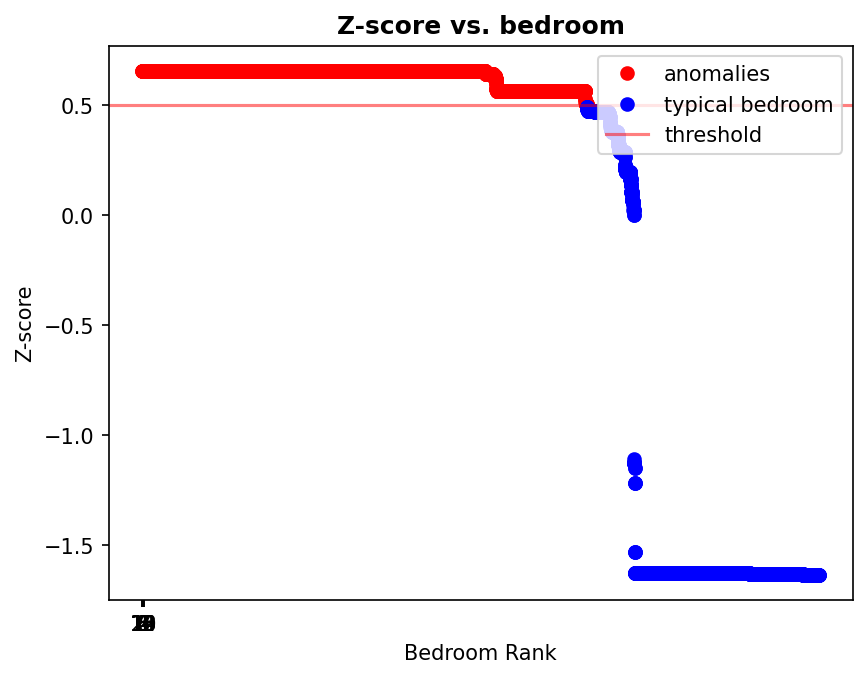

In [23]:
plot_anomaly_bedrooms(top_bedrooms['zscore'], 0.5)

Only one bedroom is picked out: Just Fontaine.

In [24]:
zscore_anomalies_bedrooms = top_bedrooms[(top_bedrooms['zscore'] > 0.5)]
zscore_anomalies_bedrooms

,,,,,,,,,,,,,,,,,,,amenities,bathrooms,bedrooms,zscore
5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE, Washington, DC 20002","This unit is located at second St NE, Uhland Terrace NE, Washington, DC 20002, Washington, 20002, DCMonthly rental rates range from $790 - $1090We have studio units available for rent",10,5.0,0,USD,No,Thumbnail,NaN,790,$790,Monthly,101,5,Washington,DC,38.9057,-76.9861,RentLingo,1577359415,0.656062
5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evansville, 47712, INMonthly rental rates range from $425 - $445We have studio - 1 beds units available for rent",5,5.0,1,USD,No,Thumbnail,NaN,425,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063,0.565064
5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arlington, VA 22209","This unit is located at N Scott St, 14th St N, Arlington, VA 22209, Arlington, 22209, VAMonthly rental rates range from $1390We have studio units available for rent",5,1.0,0,USD,No,Thumbnail,NaN,1390,"$1,390",Monthly,107,5,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410,0.656060
5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland St, Arlington","This unit is located at Washington Blvd, N Cleveland St, Arlington, Arlington, 22201, VAMonthly rental rates range from $880We have studio units available for rent",9,5.0,0,USD,No,Thumbnail,NaN,880,$880,Monthly,125,5,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401,0.656058
5667891676,housing/rent/apartment,0 BR in New York NY 10019,"**RARE GEM WITH PRIVATE OUTDOOR TERRACE****AVAILABLE IMMEDIATELY** $2475 RENT IS NET EFFECTIVE WITH one month FREE ON $2700 Monthly rent***Low Fee*UNFURNISHED Spacious and Sunny Southern facing studio (403 sq-ft) with big private terrace (130 sq. feet) basks in natural sunlight all day long, facing the scenic landscaped and peaceful residents ct. yard. The apartment features hard wood floors throughout, a carousel kitchen with new appliances and two big closets. Laundry on floor steps away.Worldwide Plaza is a full-service condo that pampers its residents with concierge and 24-hr attendant at door services, a live-in resident manager, a scenic landscaped court yard and lounge, valet service, 8 laundry rooms (washer and dryers are permitted within the residences), on-site garage and a separate full-service health club (NYSC ELITE) equipped with a 25 meter salt water pool, immersive VR spin cycling room, sauna, steam room, etc.","Dishwasher,Elevator,Patio/Deck,Pool,Storage",1.0,0,USD,No,Thumbnail,5,2475,"$2,475",Monthly,130,350 West 50th St,Manhattan,NY,40.7629,-73.9885,Listanza,1577289784,0.637554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5664597657,housing/rent/apartment,Six BR 2536 W Canyon Ridge Rd.,"This unit is located at 2536 W Canyon Ridge Rd., St. George, 84770, UTMonthly rental rates range from $3000We have 6 beds units available for rent",5,4.0,6,USD,No,Thumbnail,NaN,3000,"$3,000",Monthly,5921,2536 W Canyon Ridge Road,Saint George,UT,37.0835,-113.5823,RentLingo,1577017103,0.565075
5668640983,housing/rent/apartment,Six BR 256 Las Entradas,"This unit is located at 256 Las Entradas, Montecito, 93108, CAMonthly rental rates range from $25000We have 6 beds units available for rent",5,8.0,6,USD,No,Thumbnail,NaN,25000,"$25,000",Monthly,8716,256 Las Entradas,Montecito,CA,34.4331,-119.6331,RentLingo,1577360419,0.656328
5668643292,housing/rent/apartment,Six BR 9908 Bentcross Drive,"This unit is located at 9908 Bentcross Drive, Potomac, 20854, MDMonthly rental rates range from $11000We have 6 beds units available for rent",5,8.5,6,USD,No,Thumbnail,NaN,11000,"$11,000",Monthly,11318,9908 Bentcross Dr,Potomac,MD,39.0287,-77.2409,RentLingo,1577360560,0.656366
5668662559,housing/rent/apartment,One BR in New York NY 10069,"Monthly Rent$4,605 -to $4,790AmenitiesThe Aldyn offers some of the fin

Fontaine was indeed an amazing player, but clearly our analysis is flawed. By looking at the plot, we see that in 12 out of 21 competitions, the top goalscorer(s) scored less than the mean number of goals (7.05).

Question: What's going on?

Answer: the mean and standard deviation are themselves susceptible to the presence of anomalies. With his 13 goals, the amazing Fontaine is raising the mean so much that most players fall below it. As a result, he becomes the only anomaly.
Let's repeat this analysis with the modified z-score and see what happens.

In [25]:
median_bedrooms = np.median(top_bedrooms['bedrooms'])
median_bedrooms

1577358278.5

As before, compute the modified z-score for all players then plot and list the results. Note that the threshold remains the same at  y=+2
 .

In [26]:
mod_zscore_bedrooms, mad_bedrooms = modified_zscore(top_bedrooms['bedrooms'])
top_bedrooms = top_bedrooms.assign(mod_zscore=mod_zscore_bedrooms)

In [27]:
def plot_anomaly_bedrooms_2(score_data, threshold):
    score_data = score_data.copy().sort_values(ascending=False).values
    ranks = np.linspace(1, len(score_data), len(score_data))
    mask_outliers = (score_data > threshold)
    
    plt.figure(dpi=150)
    plt.plot(ranks[mask_outliers], score_data[mask_outliers],'o', color='r',label='anomalies')
    plt.plot(ranks[~mask_outliers], score_data[~mask_outliers],'o', color='b', label='typical bedrooms')
    plt.axhline(threshold,color='r',label='threshold', alpha=0.5)
    plt.legend(loc = 'upper right')
    plt.title('Modified z-score vs. bedrooms', fontweight='bold')
    plt.xticks(np.arange(0, 21, step=2.0))
    plt.xlabel('Bedrooms')
    plt.ylabel('Modified z-score')
    plt.show()

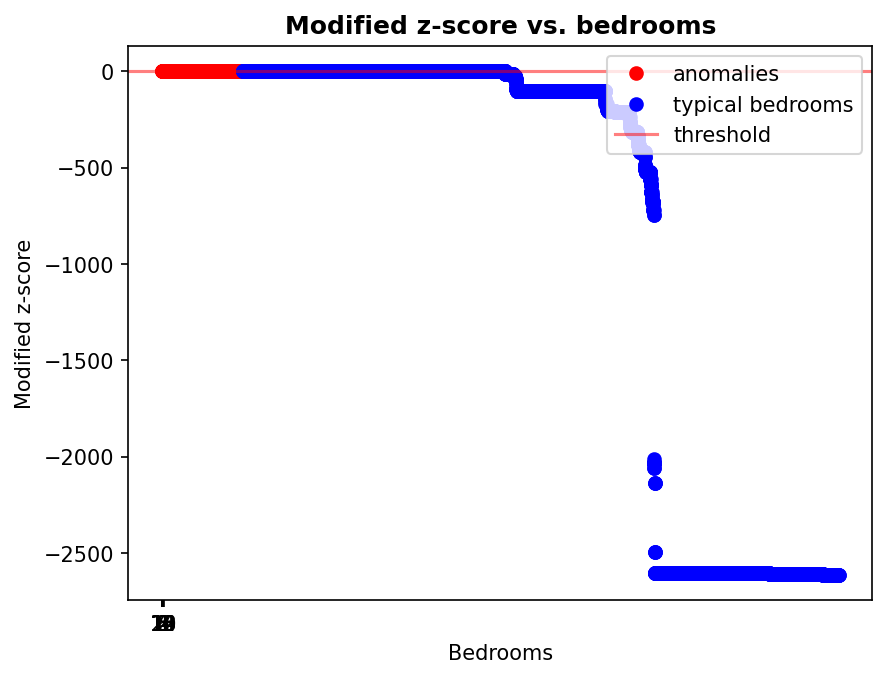

In [28]:
plot_anomaly_bedrooms_2(top_bedrooms['mod_zscore'], 0.5)

In [29]:
mod_zscore_anomalies_bedrooms = top_bedrooms[(top_bedrooms['mod_zscore'] > 0.5)]
mod_zscore_anomalies_bedrooms

,,,,,,,,,,,,,,,,,,,amenities,bathrooms,bedrooms,zscore,mod_zscore
5668634310,housing/rent/apartment,Studio apartment 6921 Roosevelt Way NE,"This unit is located at 6921 Roosevelt Way NE, Seattle, 98115, WAMonthly rental rates range from $1195We have studio units available for rent",5,1.0,0,USD,No,Thumbnail,"Cats,Dogs",1195,"$1,195",Monthly,223,6921 Roosevelt Way NE,Seattle,WA,47.6160,-122.3275,RentLingo,1577359975,0.656210,0.514627
5668640879,housing/rent/apartment,Studio apartment 714 N. 95th St.,"This unit is located at 714 N. 95th St., Seattle, 98103, WAMonthly rental rates range from $1150We have studio units available for rent",5,1.0,0,USD,No,Thumbnail,NaN,1150,"$1,150",Monthly,225,714 N 95th St,Seattle,WA,47.6160,-122.3275,RentLingo,1577360412,0.656327,0.647190
5668639212,housing/rent/apartment,Studio apartment 2037 Yale Ave E,"This unit is located at 2037 Yale Ave E, Seattle, 98102, WAMonthly rental rates range from $1250We have studio units available for rent",5,1.0,0,USD,No,Thumbnail,"Cats,Dogs",1250,"$1,250",Monthly,228,2037 Yale Avenue E,Seattle,WA,47.6160,-122.3275,RentLingo,1577360296,0.656296,0.612001
5668639708,housing/rent/apartment,Studio apartment 1008 North 109th Street,"This unit is located at 1008 North 109th Street, Seattle, 98133, WAMonthly rental rates range from $1095We have studio units available for rent",5,1.0,0,USD,No,Thumbnail,Cats,1095,"$1,095",Monthly,231,1008 North 109th St,Seattle,WA,47.6160,-122.3275,RentLingo,1577360334,0.656306,0.623529
5668636830,housing/rent/apartment,Studio apartment 202 E. HOLLY STREET,"This unit is located at 202 E. HOLLY STREET, Bellingham, 98225, WAMonthly rental rates range from $775 - $1095We have studio - 1 beds units available for rent",5,1.0,1,USD,No,Thumbnail,Cats,775,$775,Monthly,240,202 E Holly St,Bellingham,WA,48.7871,-122.4437,RentLingo,1577360135,0.656253,0.563163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5668642257,housing/rent/apartment,Six BR 245 Seawright Dr,"This unit is located at 245 Seawright Dr, Fayetteville, 30215, GAMonthly rental rates range from $3200We have 6 beds units available for rent",5,5.0,6,USD,No,Thumbnail,NaN,3200,"$3,200",Monthly,5199,245 Seawright Drive,Fayetteville,GA,33.4072,-84.4523,RentLingo,1577360489,0.656347,0.670547
5668640983,housing/rent/apartment,Six BR 256 Las Entradas,"This unit is located at 256 Las Entradas, Montecito, 93108, CAMonthly rental rates range from $25000We have 6 beds units available for rent",5,8.0,6,USD,No,Thumbnail,NaN,25000,"$25,000",Monthly,8716,256 Las Entradas,Montecito,CA,34.4331,-119.6331,RentLingo,1577360419,0.656328,0.649313
5668643292,housing/rent/apartment,Six BR 9908 Bentcross Drive,"This unit is located at 9908 Bentcross Drive, Potomac, 20854, MDMonthly rental rates range from $11000We have 6 beds units available for rent",5,8.5,6,USD,No,Thumbnail,NaN,11000,"$11,000",Monthly,11318,9908 Bentcross Dr,Potomac,MD,39.0287,-77.2409,RentLingo,1577360560,0.656366,0.692085
5668662559,housing/rent/apartment,One BR in New York NY 10069,"Monthly Rent$4,605 -to $4,790AmenitiesThe Aldyn offers some of the finest amenities amongst Upper West Side apartments. The club-style way of apartment living offers residents countless amenities right at their doorstep - the cornerstone being the 40,000 sq. feet La Palestra Athletic Club and Spa. This prestigious facility includes a 75 foot indoor pool, hot bath-tub, 38 foot rock climbing wall, basketball and squash courts, personal training, bowling alley, and more!Community Amenities 75 ft indoor swimming pool and hot bathtub 38 Rock Climbing Wall Elegant Roman and Williams designed lobby & lounge Childrens indoor children's play area by KIDVILLE Pets allowed Free shuttle to Columbus Circle & 72nd/Broadway Entertainment room with gourmet catering kitchen 24hr attendant at door/concierge services On-site parking garage Private landscaped court yard by Mathews Nielson Squash court Bike Room Bowling Alley, game room

In [30]:
print('The value of MAD is {:.2f}'.format(mad_bedrooms))

The value of MAD is 2223.50
